In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (13,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r"C:\Users\ArunMK\Downloads\movies.csv")

In [76]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [55]:
#check missing data
for col in df.columns:
    if df[col].dtypes == 'float64' or df[col].dtypes == 'int64':
        df[col] = df[col].fillna(value=df[col].mean())
    else:
        df[col] = df[col].fillna(value="Value is Missing")
#         df[col] = df[col].astype(str)
    if col in ['votes','budget','gross']:
        df[col] = df[col].astype("int64")
    per_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,per_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [118]:
# df['budget'] = df['budget'].astype('int64')

In [12]:
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [56]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


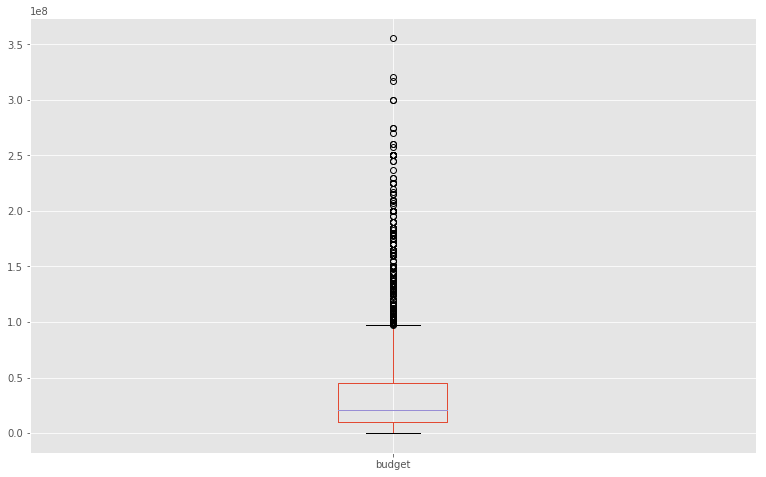

In [50]:
df.boxplot(column=["budget"])

In [65]:
df=df[df['company'].str.contains('Value is Missing')]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5730,The Wolfman,R,Drama,2010,Value is Missing,5.800000,104000,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,Value is Missing,35589876,78500541,Value is Missing,107.261613
5728,Saw: The Final Chapter,R,Crime,2010,Value is Missing,5.600000,93000,Kevin Greutert,Patrick Melton,Tobin Bell,Value is Missing,35589876,78500541,Value is Missing,107.261613
7663,More to Life,Value is Missing,Drama,2020,"October 23, 2020 (United States)",3.100000,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,Value is Missing,90.000000
7666,It's Just Us,Value is Missing,Drama,2020,"October 1, 2020 (United States)",6.390411,88108,James Randall,James Randall,Christina Roz,United States,15000,78500541,Value is Missing,120.000000
7662,The Robinsons,Value is Missing,Action,2020,"November 10, 2020 (United States)",6.390411,88108,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000,78500541,Value is Missing,90.000000


In [67]:
df =df.sort_values(by=["gross"],inplace=False ,ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5730,The Wolfman,R,Drama,2010,Value is Missing,5.800000,104000,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,Value is Missing,35589876,78500541,Value is Missing,107.261613
5728,Saw: The Final Chapter,R,Crime,2010,Value is Missing,5.600000,93000,Kevin Greutert,Patrick Melton,Tobin Bell,Value is Missing,35589876,78500541,Value is Missing,107.261613
7663,More to Life,Value is Missing,Drama,2020,"October 23, 2020 (United States)",3.100000,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,Value is Missing,90.000000
7666,It's Just Us,Value is Missing,Drama,2020,"October 1, 2020 (United States)",6.390411,88108,James Randall,James Randall,Christina Roz,United States,15000,78500541,Value is Missing,120.000000
7662,The Robinsons,Value is Missing,Action,2020,"November 10, 2020 (United States)",6.390411,88108,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000,78500541,Value is Missing,90.000000


In [17]:
#drop duplicates
df["company"].drop_duplicates().sort_values(ascending =False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

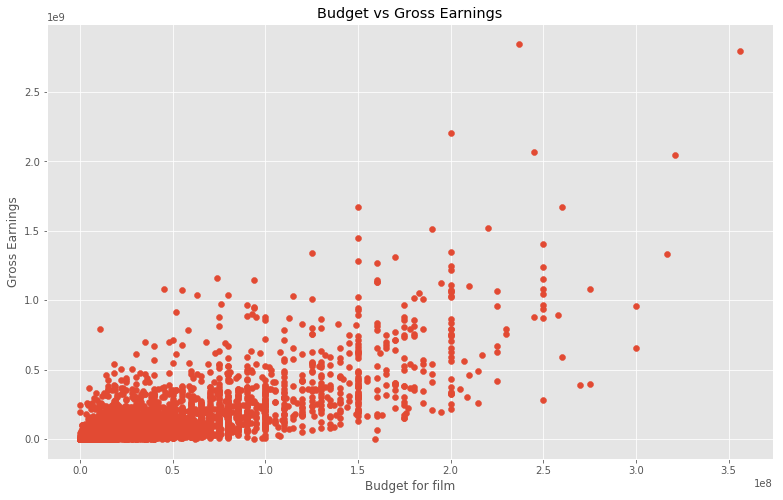

In [33]:
#scatter plot
plt.scatter(x=df["budget"],y=df["gross"])
plt.title("Budget vs Gross Earnings")
plt.xlabel("Budget for film")
plt.ylabel("Gross Earnings")
plt.show()

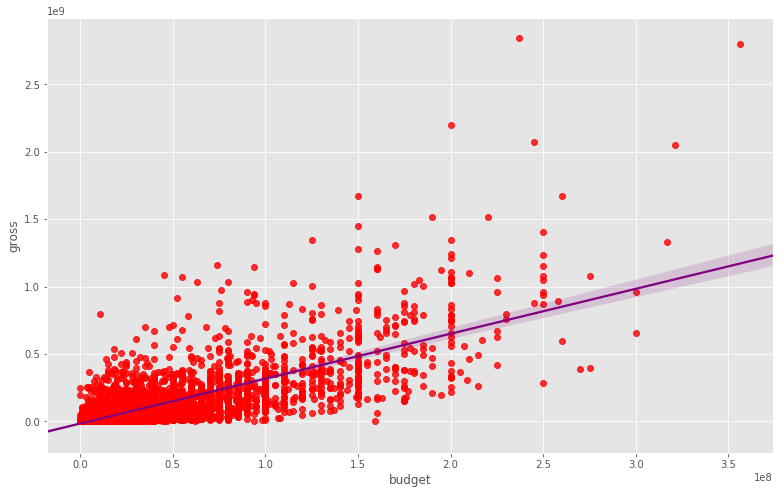

In [32]:
#seaborn plot

sns.regplot(x="budget",y="gross",data=df, scatter_kws={"color":"red"}, line_kws={"color":"purple"})

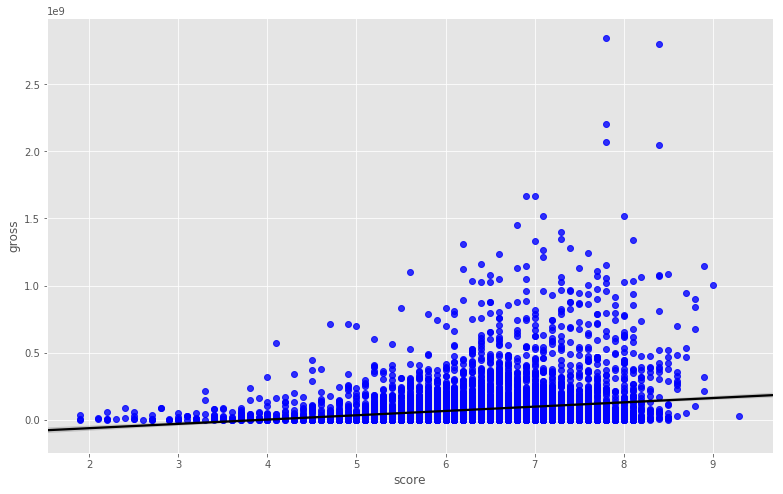

In [51]:
sns.regplot(x="score",y="gross",data=df, scatter_kws={"color":"blue"}, line_kws={"color":"black"})

In [58]:
df.corr(method="pearson")#methods-pearson,kendall,spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097936,0.222810,0.265578,0.252042,0.120766
score,0.097936,1.000000,0.409182,0.064541,0.182868,0.399329
votes,0.222810,0.409182,1.000000,0.421007,0.628713,0.309166
budget,0.265578,0.064541,0.421007,1.000000,0.711270,0.265287
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241335
runtime,0.120766,0.399329,0.309166,0.265287,0.241335,1.000000


In [59]:
df.corr(method="kendall")

,year,score,votes,budget,gross,runtime
year,1.000000,0.067518,0.331581,0.144258,0.182415,0.097271
score,0.067518,1.000000,0.300035,0.003606,0.080332,0.283303
votes,0.331581,0.300035,1.000000,0.161337,0.508040,0.198199
budget,0.144258,0.003606,0.161337,1.000000,0.258476,0.161710
gross,0.182415,0.080332,0.508040,0.258476,1.000000,0.156135
runtime,0.097271,0.283303,0.198199,0.161710,0.156135,1.000000


In [60]:
df.corr(method="spearman")

,year,score,votes,budget,gross,runtime
year,1.000000,0.098869,0.470008,0.202558,0.267101,0.143114
score,0.098869,1.000000,0.428026,0.004842,0.117961,0.399451
votes,0.470008,0.428026,1.000000,0.234535,0.688687,0.290105
budget,0.202558,0.004842,0.234535,1.000000,0.361668,0.227859
gross,0.267101,0.117961,0.688687,0.361668,1.000000,0.227986
runtime,0.143114,0.399451,0.290105,0.227859,0.227986,1.000000


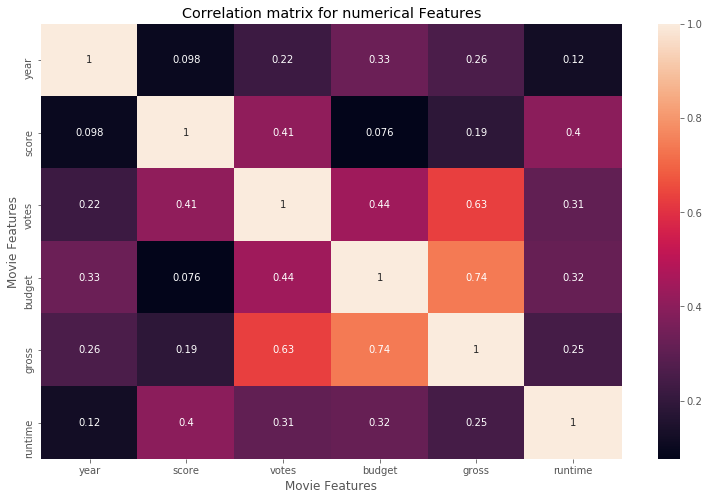

In [36]:
#correlation matrix
correlation_matrix=df.corr(method="pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation matrix for numerical Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [68]:
df_num=df
for col_name in df_num.columns:
    if(df_num[col_name].dtype=="object"):
        df_num[col_name]= df_num[col_name].astype("category")
        df_num[col_name]=df_num[col_name].cat.codes
df_num.head()    

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5730,15,2,4,2010,15,5.800000,104000,6,1,1,3,35589876,78500541,0,107.261613
5728,10,2,3,2010,15,5.600000,93000,10,16,16,3,35589876,78500541,0,107.261613
7663,8,4,4,2020,11,3.100000,18,8,8,15,2,7000,78500541,0,90.000000
7666,3,4,4,2020,10,6.390411,88108,4,5,4,2,15000,78500541,0,120.000000
7662,14,4,0,2020,7,6.390411,88108,1,0,2,2,10000,78500541,0,90.000000


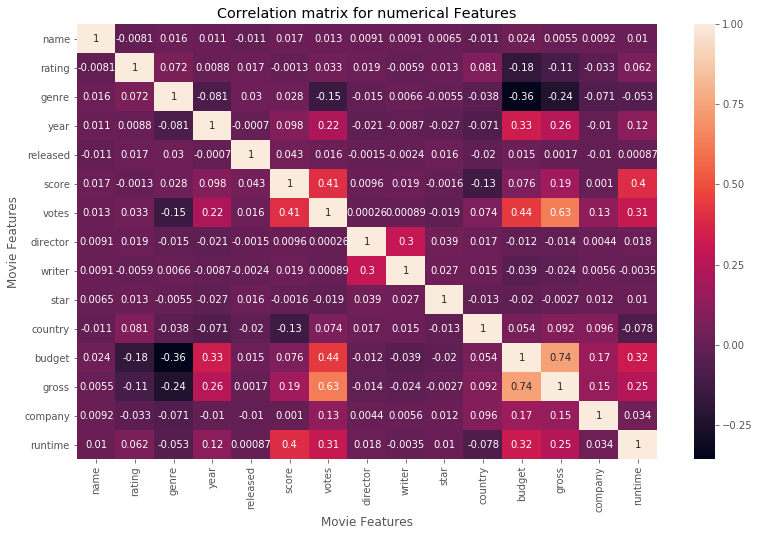

In [47]:
correlation_matrix=df_num.corr(method="pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation matrix for numerical Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [48]:
df_num.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174


In [61]:
correlation_mat=df_num.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
         score       0.017097
         votes       0.013088
         director    0.009079
         writer      0.009081
         star        0.006472
         country    -0.010737
         budget      0.023970
         gross       0.005533
         company     0.009211
         runtime     0.010392
rating   name       -0.008069
         rating      1.000000
         genre       0.072423
         year        0.008779
         released    0.016613
         score      -0.001314
         votes       0.033225
         director    0.019483
         writer     -0.005921
         star        0.013405
         country     0.081244
         budget     -0.176002
         gross      -0.107339
         company    -0.032943
         runtime     0.062145
                       ...   
company  name        0.009211
         rating     -0.032943
         g

In [70]:
sorted_pairs=corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

budget    genre      -0.356564
genre     budget     -0.356564
          gross      -0.235650
gross     genre      -0.235650
rating    budget     -0.176002
budget    rating     -0.176002
genre     votes      -0.145307
votes     genre      -0.145307
score     country    -0.133348
country   score      -0.133348
gross     rating     -0.107339
rating    gross      -0.107339
year      genre      -0.081261
genre     year       -0.081261
country   runtime    -0.078412
runtime   country    -0.078412
company   genre      -0.071067
genre     company    -0.071067
year      country    -0.070938
country   year       -0.070938
runtime   genre      -0.052711
genre     runtime    -0.052711
writer    budget     -0.039451
budget    writer     -0.039451
genre     country    -0.037615
country   genre      -0.037615
company   rating     -0.032943
rating    company    -0.032943
star      year       -0.027242
year      star       -0.027242
                        ...   
votes     runtime     0.309212
budget  

In [64]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64


In [77]:
df.groupby(['company', 'year'])[["gross"]].sum()

gross
company                              year             
"DIA" Productions GmbH & Co. KG      2003   44350926.0
"Weathering With You" Film Partners  2019  193457467.0
.406 Production                      1996      10580.0
1+2 Seisaku Iinkai                   2000    1196218.0
10 West Studios                      2010     814906.0
120 Films                            2002    6479328.0
120dB Films                          2009      26676.0
                                     2016     368372.0
13 Productions                       2000      25461.0
1492 Pictures                        1996  129832389.0
                                     1999   87423861.0
1818 Productions                     1983   12232628.0
19 Entertainment                     2003    4928883.0
1978 Films                           2017   40656399.0
1984 Private Defense Contractors     2014   58834384.0
1992 Number Four Limited Partnership 1995    4686937.0
2 Loop Films                         2002     264349.0
2.0 Entertainment                    2019  122810399.0
2.4.7. Films                         2007   22783978.0
2003 Productions                     2004   69424389.0
20th Century Studios                 2020  111105497.0
21 Laps Entertainment                2014   41296320.0
                                     2018   41142379.0
21st Century Film Corporation        1989    3953745.0
                                     1990    7658401.0
21st Century Films                   1994    1702394.0
25th Hour Productions                2002   23932055.0
26 Films                             2009   20458873.0
2929 Productions                     2007    7248490.0
                                     2008   28705178.0
...                                                ...
Zazen Produções                      2007   14759148.0
Zenith Entertainment                 1984     876775.0
                                     1987    2079808.0
Zentropa Entertainments              1998          0.0
                                     2000   40059672.0
                                     2003   16689283.0
                                     2005     674918.0
                                     2006   11632723.0
                                     2009    7413863.0
                                     2011   17039814.0
                                     2012   14758997.0
                                     2013   18485881.0
                                     2014    1363964.0
                                     2018    3081913.0
Zentropa International Norway        2012     712216.0
Zeta Entertainment                   1992     114516.0
Zoetrope Studios                     1981     636796.0
                                     1982     143369.0
                                     1983   40241641.0
                                     1984   25928721.0
                                     1985     569996.0
Zucker Brothers Productions          1998    7027290.0
Zupnik-Curtis Enterprises            1984   12145169.0
double A Films                       2000    2046433.0
erbp                                 2013     587174.0
i am OTHER                           2015   17986781.0
i5 Films                             2001   10031529.0
iDeal Partners Film Fund             2013     506303.0
micro_scope                          2010    7099598.0
thefyzz                              2017   62198461.0

[4536 rows x 1 columns]